# Credit Limit

![image](image.png)


# GiriÅŸ ðŸŒŸ


MÃ¼ÅŸteri kaybÄ±, mÃ¼ÅŸterilerin bir ÅŸirketle iÅŸ yapmayÄ± bÄ±raktÄ±ÄŸÄ± durum olarak, bankacÄ±lÄ±k dahil Ã§eÅŸitli endÃ¼strilerdeki iÅŸletmeler iÃ§in kritik bir endiÅŸe kaynaÄŸÄ±dÄ±r. MÃ¼ÅŸteri kaybÄ±na katkÄ±da bulunan faktÃ¶rleri anlamak, bankalarÄ±n mÃ¼ÅŸterileri elde tutma ve karlÄ±lÄ±ÄŸÄ± sÃ¼rdÃ¼rme stratejileri geliÅŸtirmesine yardÄ±mcÄ± olabilir. MÃ¼ÅŸteri kaybÄ± analizine ek olarak, kredi kartÄ± kullanÄ±mÄ± desenlerinin analizi, mÃ¼ÅŸteri davranÄ±ÅŸÄ± ve tercihleri hakkÄ±nda deÄŸerli iÃ§gÃ¶rÃ¼ler saÄŸlar.


### Gerekli KÃ¼tÃ¼phaneleri Ä°Ã§eri AktarmaðŸ“¦

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def pandas_ince_ayar():
    pd.set_option('display.max_columns', None)
    pd.set_option("display.max_rows", None)
    pd.set_option('display.width', 500)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: "%.1f" % x)
    warnings.simplefilter(action='ignore', category=Warning)


# Fonksiyonu Ã§aÄŸÄ±rarak ayarlarÄ± belirleyebilirsiniz
pandas_ince_ayar()

# Veri Ã–n Ä°ÅŸleme ve DoÄŸrulama ðŸ§¹

In [3]:
# Import the Credit_Limit.csv file
df = pd.read_csv('Credit_Limit.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
0  768805383  Existing Customer            45      M     High School        Married     $60K - $80K          Blue              39                         5                      3       12691.0                  777          11914.0             1144
1  818770008  Existing Customer            49      F        Graduate         Single  Less than $40K          Blue              44                         6                      2        8256.0                  864           7392.0             1291
2  713982108  Existing Customer            51      M        Graduate        Married    $80K - $120K          Blue              36                         4                      0        3418.0                    0           3418.0             1887
3  769911858  Existing Customer            40      F     High School        Unknown  Less than $40K          Blue              34                         3                      1        3313.0                 2517            796.0             1171
4  709106358  Existing Customer            40      M      Uneducated        Married     $60K - $80K          Blue              21                         5                      0        4716.0                    0           4716.0              816

## Veriye Genel BakÄ±ÅŸ

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(dataframe.nunique())

check_df(df)

##################### Shape #####################
(10127, 15)
##################### Types #####################
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
dtype: object
##################### Head #####################
   CLIENTNUM     Attrition_Flag  Customer_Age Gender Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
0  768805383  Existing Customer      

#### Veri setiyle ilgili bazÄ± bilgiler:

- Toplamda 10,127 giriÅŸ var ve 15 sÃ¼tun. 
- MÃ¼ÅŸterilerin yaÅŸlarÄ±, cinsiyetleri, eÄŸitim seviyeleri, medeni durumlarÄ±, gelir kategorileri ve kredi kartÄ± kategorileri gibi Ã¶zellikler bulunmakta. 

#### AyrÄ±ca mÃ¼ÅŸterilerin kredi limitleri, kredi kartÄ± kullanÄ±mÄ± ve diÄŸer finansal Ã¶lÃ§Ã¼tler de veri setinde yer alÄ±yor. 

In [5]:
# Veri temizleme ve doÄŸrulama analizi gerÃ§ekleÅŸtirelim

# Eksik deÄŸerlere sahip tÃ¼m satÄ±rlarÄ± uÃ§uralÄ±m 
data_cleaned = df.dropna()

# TemizlenmiÅŸ veri kÃ¼mesinin ÅŸeklini kontrol edin
data_cleaned.shape

# "Attrition_Flag" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Attrition_Flag"] = data_cleaned["Attrition_Flag"].astype("category")

# "Cinsiyet" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Gender"] = data_cleaned["Gender"].astype("category")

# "Education_Level" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Education_Level"] = data_cleaned["Education_Level"].astype("category")

# "Marital_Status" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].astype("category")

# "Income_Category" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Income_Category"] = data_cleaned["Income_Category"].astype("category")

# "Card_Category" sÃ¼tununu kategorik bir veri tÃ¼rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data_cleaned["Card_Category"] = data_cleaned["Card_Category"].astype("category")

# DÃ¶nÃ¼ÅŸtÃ¼rmeden sonra sÃ¼tunlarÄ±n veri tÃ¼rlerini kontrol edin
data_cleaned.dtypes


CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Trans_Amt                int64
dtype: object

In [6]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
0  768805383  Existing Customer            45      M     High School        Married     $60K - $80K          Blue              39                         5                      3       12691.0                  777          11914.0             1144
1  818770008  Existing Customer            49      F        Graduate         Single  Less than $40K          Blue              44                         6                      2        8256.0                  864           7392.0             1291
2  713982108  Existing Customer            51      M        Graduate        Married    $80K - $120K          Blue              36                         4                      0        3418.0                    0           3418.0             1887
3  769911858  Existing Customer            40      F     High School        Unknown  Less than $40K          Blue              34                         3                      1        3313.0                 2517            796.0             1171
4  709106358  Existing Customer            40      M      Uneducated        Married     $60K - $80K          Blue              21                         5                      0        4716.0                    0           4716.0              816

# KeÅŸifÃ§i Veri AnaliziðŸ“š
### Kategorik  deÄŸiÅŸkenler arasÄ± korelasyon analizi

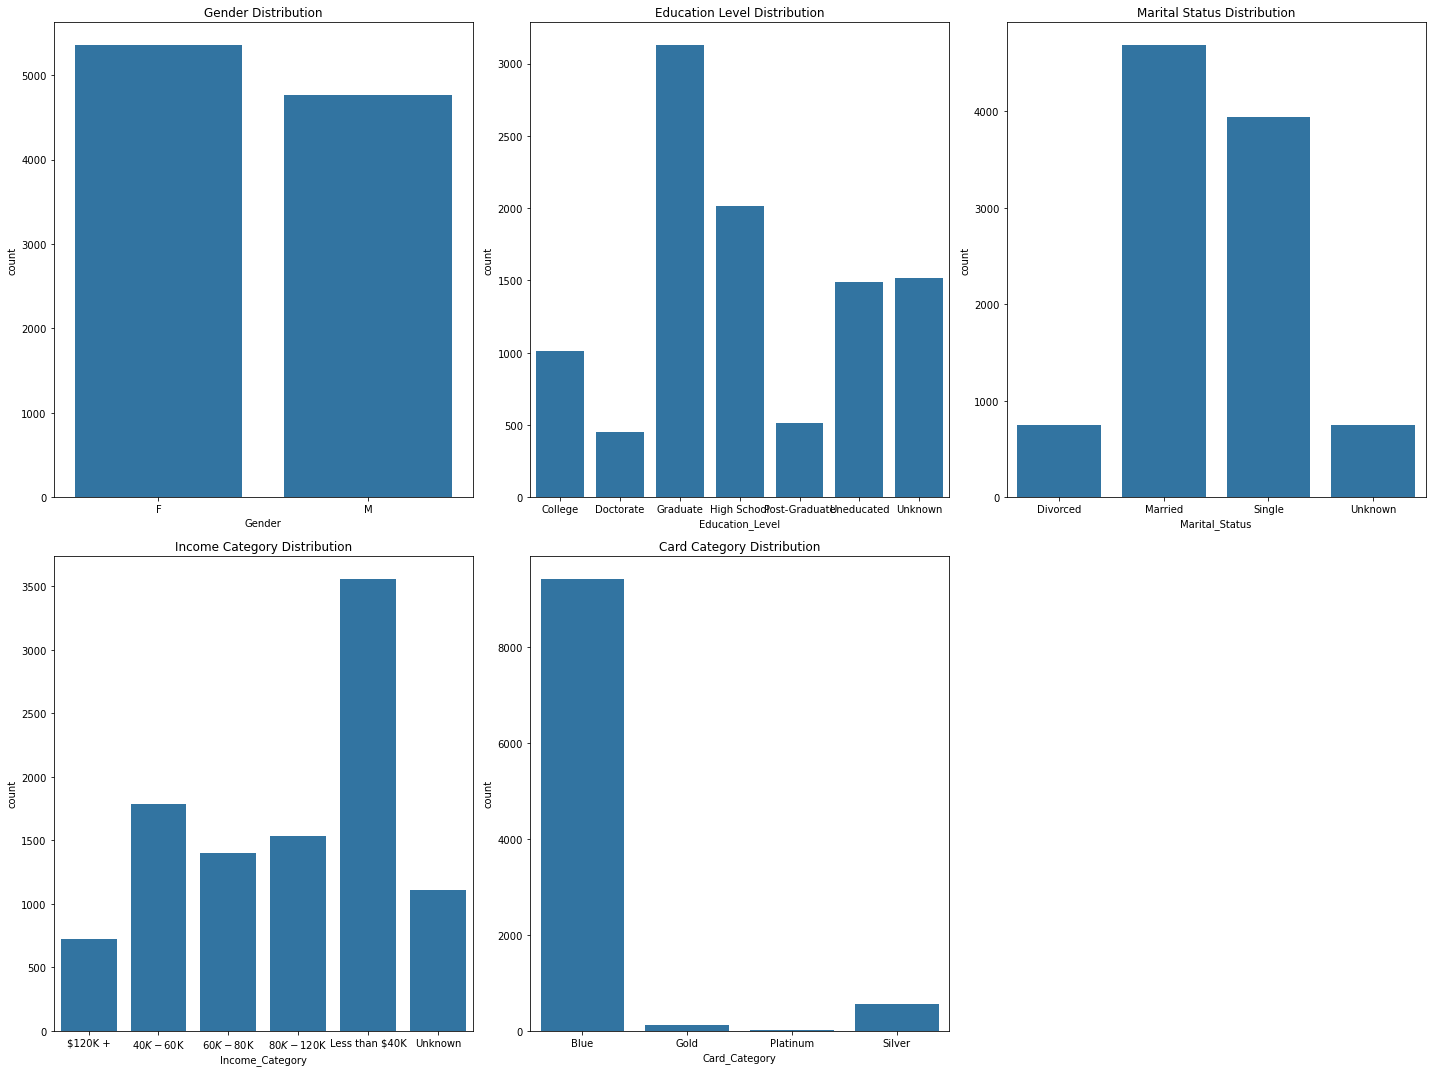

In [7]:
# Kategorik deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mlarÄ±nÄ± gÃ¶rselleÅŸtirme
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data_cleaned)
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Education_Level', data=data_cleaned)
plt.title('Education Level Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Marital_Status', data=data_cleaned)
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Income_Category', data=data_cleaned)
plt.title('Income Category Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Card_Category', data=data_cleaned)
plt.title('Card Category Distribution')

plt.tight_layout()
plt.show()


### her bir kategorik deÄŸiÅŸken iÃ§in attrition durumuna gÃ¶re gruplandÄ±rÄ±lmÄ±ÅŸ Ã§ubuk grafikleri

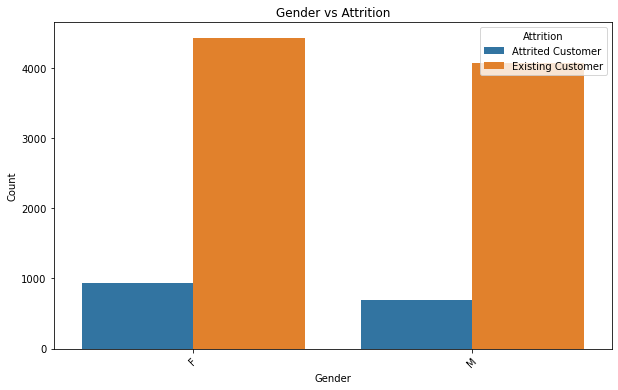

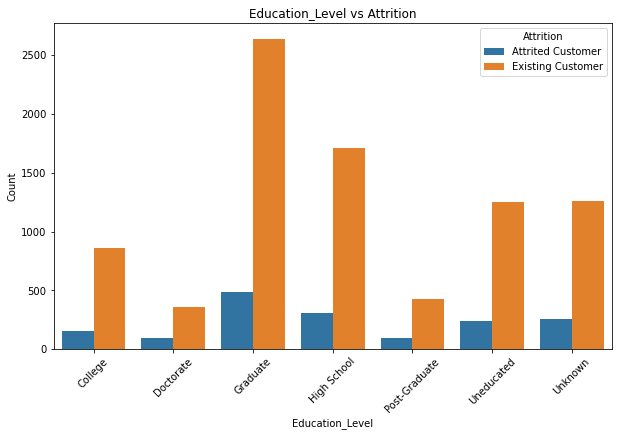

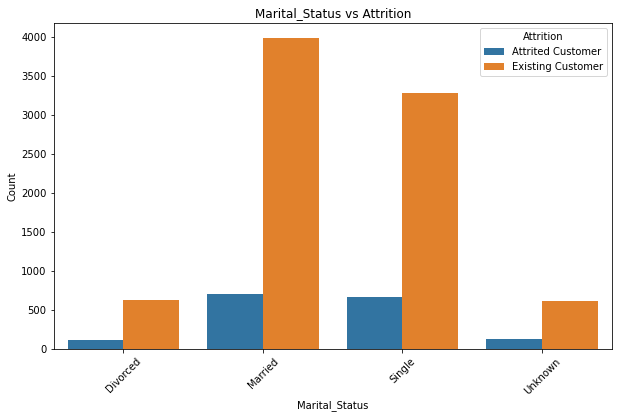

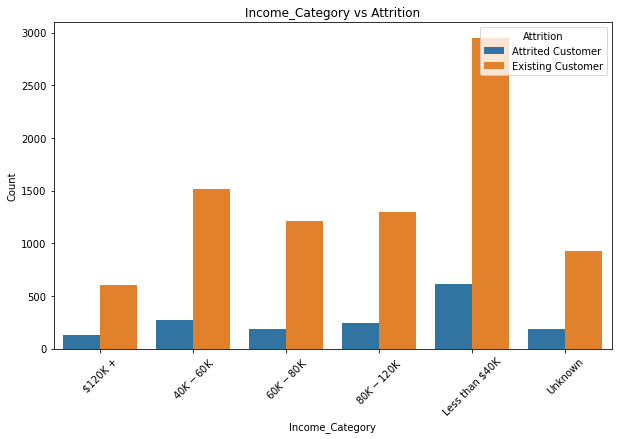

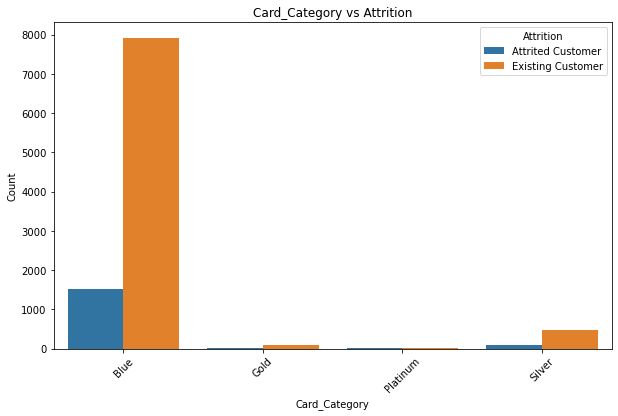

In [8]:
# Kategorik deÄŸiÅŸkenlerin listesi
categorical_variables = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# Her bir kategorik deÄŸiÅŸken iÃ§in Ã§ubuk grafikleri Ã§izin
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue="Attrition_Flag", data=data_cleaned)
    plt.title(f"{variable} vs Attrition")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Attrition", loc="upper right")
    plt.show()


## DeÄŸiÅŸken Ä°liÅŸkilerini KeÅŸfetme:  Korelasyon Matrisi IsÄ± HaritasÄ±


Bu kod, veri setinizdeki sayÄ±sal deÄŸiÅŸkenler arasÄ±ndaki korelasyonu hesaplayacak ve ardÄ±ndan bu korelasyonlarÄ± Ä±sÄ± haritasÄ± olarak gÃ¶rselleÅŸtirecektir. annot=True parametresi, her hÃ¼credeki korelasyon deÄŸerlerini gÃ¶stermek iÃ§in kullanÄ±lÄ±r. cmap='coolwarm' parametresi, kullanÄ±lan renk haritasÄ±nÄ± belirler.



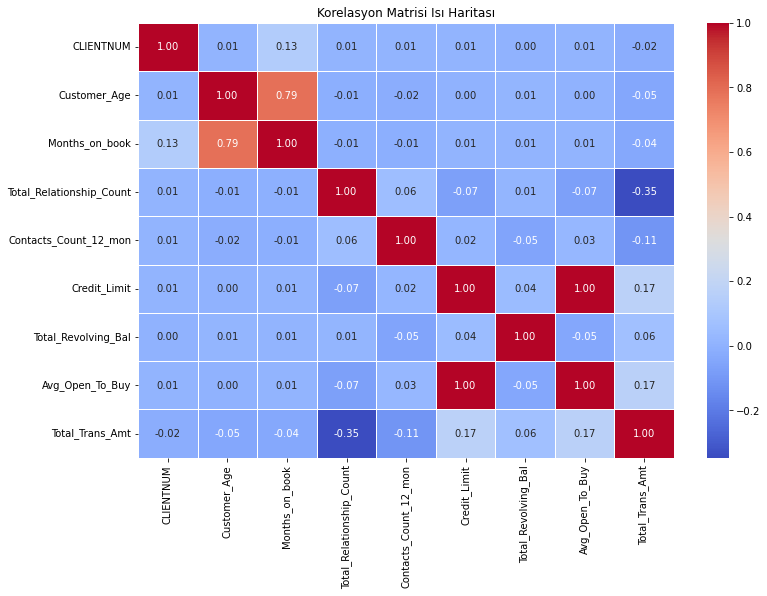

In [9]:
# YalnÄ±zca sayÄ±sal verileri iÃ§eren bir alt veri kÃ¼mesi oluÅŸturma
numeric_data = data_cleaned.select_dtypes(include=np.number)

# Korelasyon matrisini yeniden hesaplayÄ±n
correlation_matrix = numeric_data.corr()

# Korelasyon matrisini gÃ¶rselleÅŸtirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi IsÄ± HaritasÄ±')
plt.show()


## DeÄŸiÅŸken Ä°liÅŸkilerini KeÅŸfetme: Phik Korelasyon IsÄ± HaritasÄ±

interval columns not set, guessing: ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


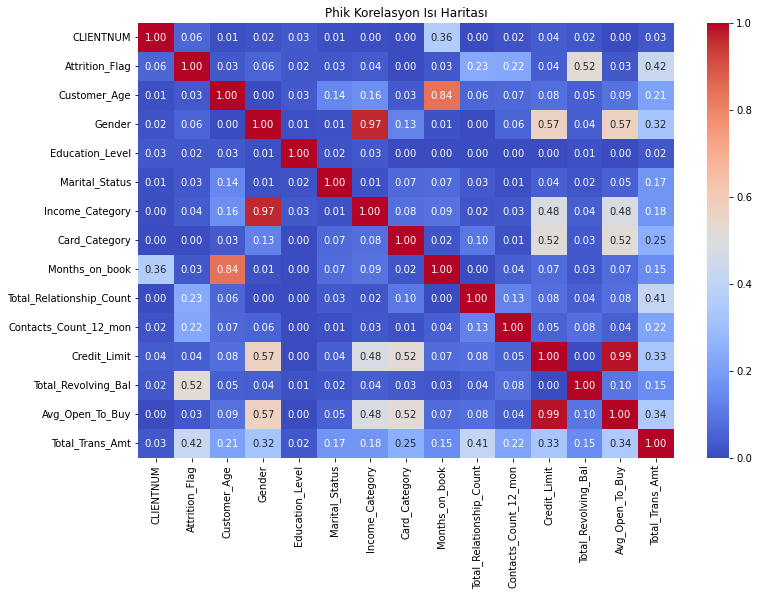

In [10]:
# Phik korelasyonu iÃ§in gerekli kÃ¼tÃ¼phane
import phik

# Phik korelasyon matrisini hesapla
phik_matrix = data_cleaned.phik_matrix()

# Korelasyon matrisini Ä±sÄ± haritasÄ± olarak gÃ¶rselleÅŸtir
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phik Korelasyon IsÄ± HaritasÄ±')
plt.show()


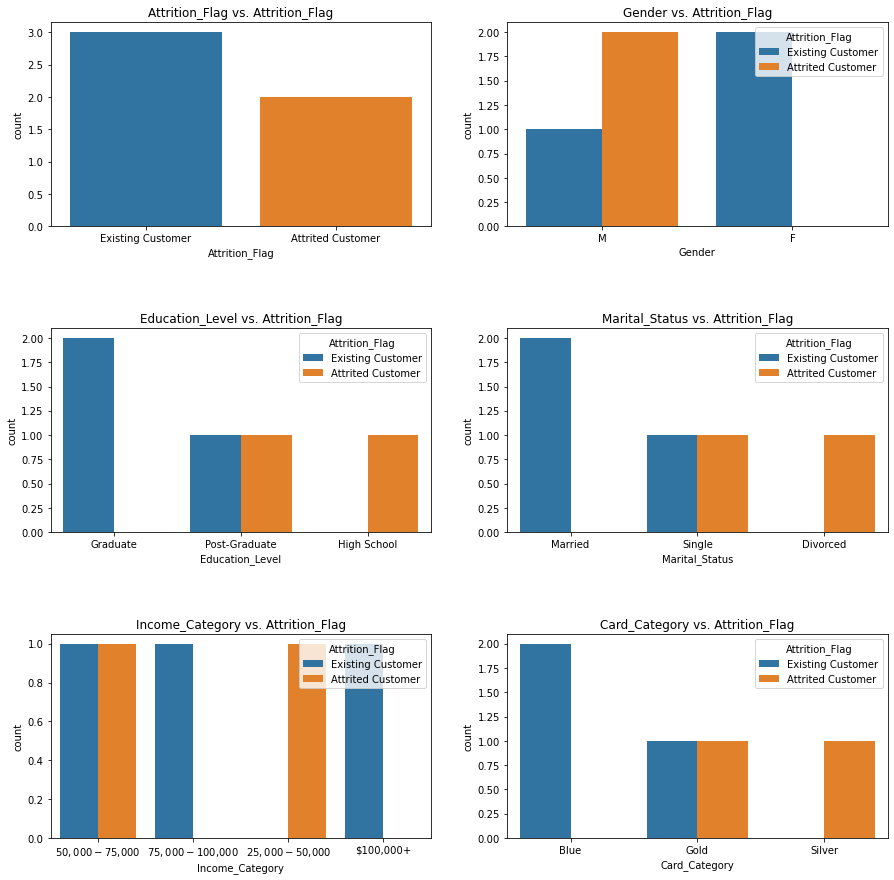

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ã–rnek olarak, mÃ¼ÅŸteri sadakatini etkileyebilecek bazÄ± Ã¶zelliklere sahip bir veri seti oluÅŸturuyoruz.
data = pd.DataFrame({
    'CLIENTNUM': [1, 2, 3, 4, 5],
    'Attrition_Flag': ['Existing Customer', 'Existing Customer', 'Attrited Customer', 'Existing Customer', 'Attrited Customer'],
    'Customer_Age': [35, 45, 28, 50, 40],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Education_Level': ['Graduate', 'Post-Graduate', 'High School', 'Graduate', 'Post-Graduate'],
    'Marital_Status': ['Married', 'Single', 'Single', 'Married', 'Divorced'],
    'Income_Category': ['$50,000-$75,000', '$75,000-$100,000', '$25,000-$50,000', '$100,000+', '$50,000-$75,000'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Blue', 'Gold'],
    'Months_on_book': [24, 36, 12, 48, 30],
    'Total_Relationship_Count': [3, 5, 2, 6, 4],
    'Contacts_Count_12_mon': [2, 3, 1, 4, 2],
    'Credit_Limit': [5000, 10000, 3000, 15000, 8000],
    'Total_Revolving_Bal': [1000, 2000, 500, 3000, 1500],
    'Avg_Open_To_Buy': [4000, 8000, 2500, 12000, 6500],
    'Total_Trans_Amt': [2000, 3000, 1000, 5000, 2500]
})

# Veri setindeki kategorik sÃ¼tunlarÄ± tanÄ±mlayalÄ±m
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# SeÃ§ilen kategorik sÃ¼tunlardaki deÄŸerlerin daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶rselleÅŸtirme
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, hue='Attrition_Flag', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{column} vs. Attrition_Flag')

plt.subplots_adjust(hspace=0.5)
plt.show()


## Analysing Categorical Data

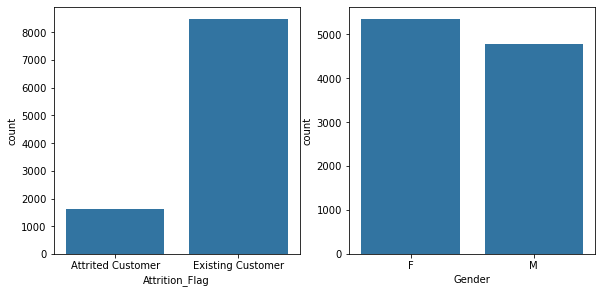

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Attrition_Flag', data=data_cleaned)

plt.subplot(2, 3, 2)
sns.countplot(x='Gender', data=data_cleaned)

plt.show()

### MÃ¼ÅŸteri KaybÄ± Analizi
Bu sÃ¼reÃ§te, 'Attrition_Flag' (mÃ¼ÅŸteri kaybÄ±) sÃ¼tunu Ã¼zerinde bir gruplandÄ±rma gerÃ§ekleÅŸtirir ve her kategori iÃ§in sayÄ±sal Ã¶zelliklerin ortalamasÄ±nÄ± gÃ¶sterir.

In [13]:
# Kategorik sÃ¼tunlarÄ± sayÄ±sal temsillere dÃ¶nÃ¼ÅŸtÃ¼rÃ¼n
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['Education_Level'] = data['Education_Level'].map({'Graduate': 0, 'Post-Graduate': 1, 'High School': 2}) 
data['Marital_Status'] = data['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
data['Income_Category'] = data['Income_Category'].map({'$25,000-$50,000': 0, '$50,000-$75,000': 1, '$75,000-$100,000': 2, '$100,000+': 3})
data['Card_Category'] = data['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2}) 

# Verileri 'Attrition_Flag' ile gruplandÄ±rarak ve sayÄ±sal Ã¶zelliklerin ortalamasÄ±nÄ± hesaplayarak
churn_analysis = data.groupby('Attrition_Flag').mean()

# Churn analizi sonuÃ§larÄ±nÄ± gÃ¶rÃ¼ntÃ¼leme
print("Customer Churn Analysis:")
print(churn_analysis)


Customer Churn Analysis:
                CLIENTNUM  Customer_Age  Gender  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
Attrition_Flag                                                                                                                                                                                                                                        
0                     2.3          43.3     0.7              0.3             0.7              2.0            0.7            36.0                       4.7                    3.0       10000.0               2000.0           8000.0           3333.3
1                     4.0          34.0     0.0              1.5             1.0              0.5            1.5            21.0                       3.0                    1.5        5500.0               1000.0           4500.0     

### Kategorik SÃ¼tunlarÄ±n Ä°liÅŸkisi

Bu, 'Gender' sÃ¼tunu ile 'Attrition_Flag' sÃ¼tunu arasÄ±ndaki iliÅŸkiyi gÃ¶rselleÅŸtirir.

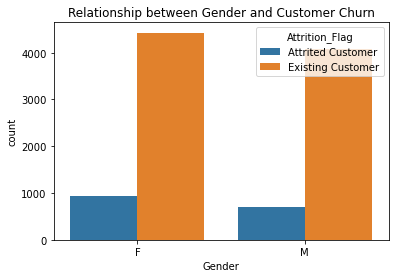

In [14]:
# Kategorik sÃ¼tunlar arasÄ±ndaki iliÅŸkiyi analiz etme

sns.countplot(x='Gender', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Gender and Customer Churn')
plt.show()


### Gelir Seviyesine GÃ¶re Analiz

Bu alanda, 'Income_Category' (gelir seviyesi) sÃ¼tunu ile 'Credit_Limit' sÃ¼tunu arasÄ±ndaki iliÅŸkiyi gÃ¶rselleÅŸtirir

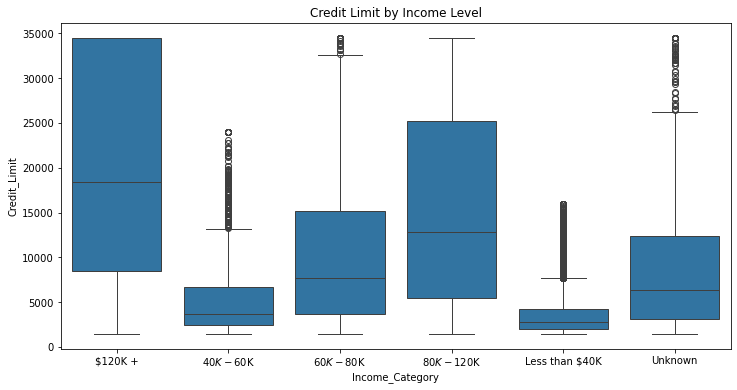

In [15]:
#Analysis by Income Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned)
plt.title('Credit Limit by Income Level')
plt.show()

### YaÅŸ ve Toplam Harcama ArasÄ±ndaki Ä°liÅŸki

mÃ¼ÅŸteri yaÅŸÄ±na gÃ¶re toplam harcamanÄ±n mÃ¼ÅŸteri kaybÄ± Ã¼zerindeki etkisini gÃ¶rselleÅŸtirir

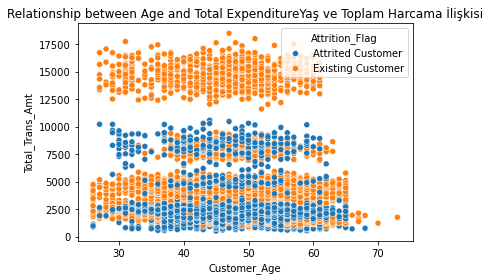

In [16]:
# YaÅŸ ve toplam harcama arasÄ±ndaki iliÅŸkinin analiz edilmesi
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Age and Total ExpenditureYaÅŸ ve Toplam Harcama Ä°liÅŸkisi')
plt.show()


### MÃ¼ÅŸteri DavranÄ±ÅŸ Analizi

Bu kod, mÃ¼ÅŸterilerin toplam iÅŸlem tutarÄ± ile dÃ¶ner bakiye arasÄ±ndaki iliÅŸkiyi gÃ¶rselleÅŸtirmektedir. Ä°kinci grafik, mÃ¼ÅŸteri kaybÄ±na gÃ¶re toplam iÅŸlem tutarÄ±nÄ± gÃ¶stermektedir.

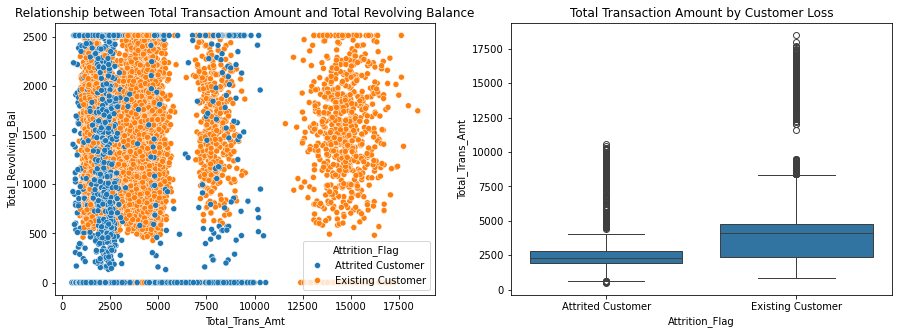

In [17]:
# MÃ¼ÅŸteri DavranÄ±ÅŸ Analizi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Total_Trans_Amt', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Total Transaction Amount and Total Revolving Balance')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data_cleaned)
plt.title('Total Transaction Amount by Customer Loss')

plt.show()

### Gelir ve Kredi Limiti ArasÄ±ndaki Ä°liÅŸki

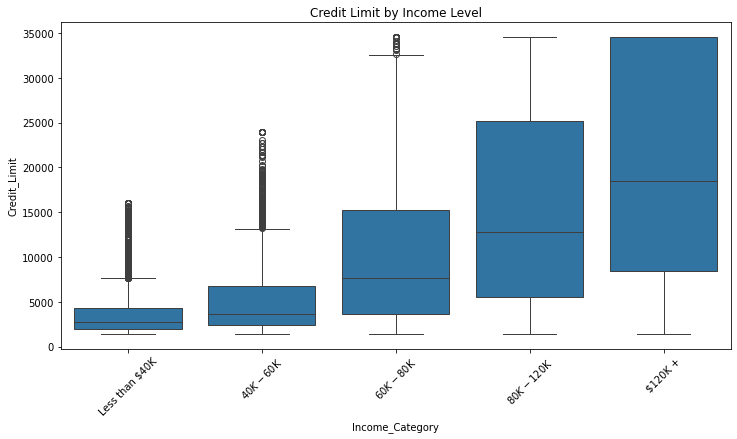

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned, order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])
plt.title('Credit Limit by Income Level')
plt.xticks(rotation=45)
plt.show()

### Veri GÃ¶rselleÅŸtirme ve Ä°nteraktif Grafikler

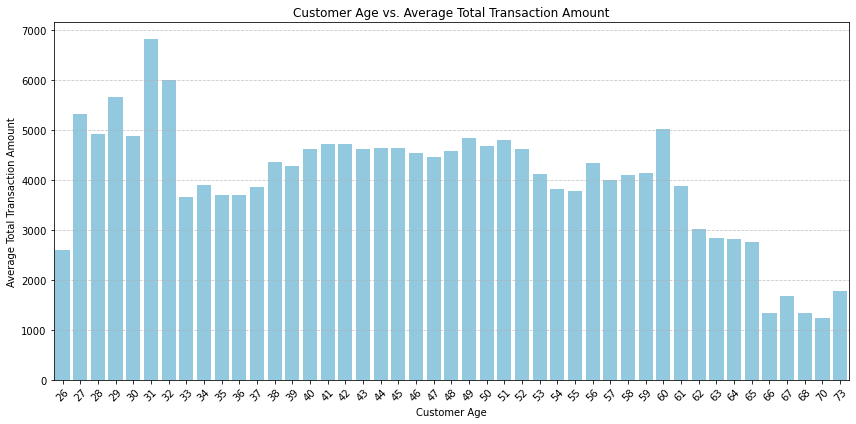

In [19]:
# MÃ¼ÅŸteri yaÅŸlarÄ±na gÃ¶re ortalama toplam harcamalarÄ± hesapla
avg_total_trans_by_age = data_cleaned.groupby('Customer_Age')['Total_Trans_Amt'].mean().reset_index()

# Ã‡ubuk grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Age', y='Total_Trans_Amt', data=avg_total_trans_by_age, color='skyblue')
plt.title('Customer Age vs. Average Total Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Average Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### mÃ¼ÅŸterilerin yaÅŸlarÄ±na gÃ¶re terk eden ve terk etmeyen mÃ¼ÅŸterilerin daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶steren bir histogram oluÅŸturur.

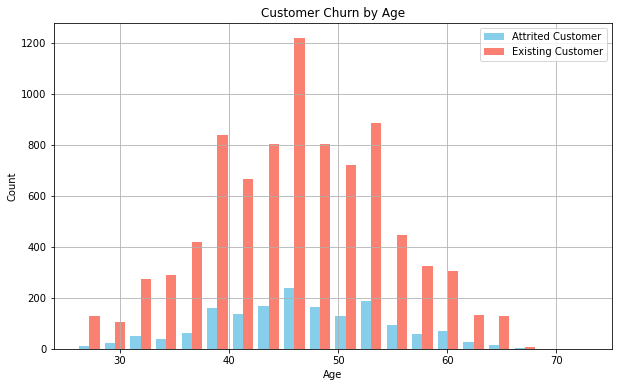

In [20]:
# Terk eden ve terk etmeyen mÃ¼ÅŸterilerin yaÅŸlarÄ±nÄ± ayrÄ± ayrÄ± alalÄ±m
churned_customers_age = data_cleaned[data_cleaned['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
existing_customers_age = data_cleaned[data_cleaned['Attrition_Flag'] == 'Existing Customer']['Customer_Age']

# HistogramÄ± oluÅŸturalÄ±m
plt.figure(figsize=(10, 6))
plt.hist([churned_customers_age, existing_customers_age], bins=20, color=['skyblue', 'salmon'], label=['Attrited Customer', 'Existing Customer'])
plt.title('Customer Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


### Ä°leri Analizler ve Modelleme

Bu sÃ¼reÃ§, bir Rastgele Orman sÄ±nÄ±flandÄ±rÄ±cÄ±sÄ± kullanarak mÃ¼ÅŸteri kaybÄ±nÄ± tahmin etmek iÃ§in bir model oluÅŸturur. Modelin performansÄ±nÄ± deÄŸerlendirmek iÃ§in karÄ±ÅŸÄ±klÄ±k matrisini ve sÄ±nÄ±flandÄ±rma raporu sonuÃ§larÄ±nÄ± gÃ¶rÃ¼ntÃ¼ler.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veri setini hazÄ±rlama
X = data_cleaned.drop('Attrition_Flag', axis=1)
y = data_cleaned['Attrition_Flag']

# Kategorik sÃ¼tunlarÄ±n tek sÄ±cak kodlamasÄ±
X = pd.get_dummies(X, drop_first=True)

# Verileri eÄŸitim ve test kÃ¼melerine ayÄ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bir Rastgele Orman sÄ±nÄ±flandÄ±rÄ±cÄ± modeli oluÅŸturma ve eÄŸitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model deÄŸerlendirmesi
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 200  127]
 [  25 1674]]
                   precision    recall  f1-score   support

Attrited Customer       0.89      0.61      0.72       327
Existing Customer       0.93      0.99      0.96      1699

         accuracy                           0.92      2026
        macro avg       0.91      0.80      0.84      2026
     weighted avg       0.92      0.92      0.92      2026



# Model DeÄŸerlendirme

Modelimizin performansÄ±nÄ± deÄŸerlendirmek iÃ§in bu Ã§Ä±ktÄ±larÄ± yorumlayalÄ±m:

1. **KarmaÅŸÄ±klÄ±k Matrisi (Confusion Matrix):**
   - KarmaÅŸÄ±klÄ±k matrisi, modelinizin doÄŸruluÄŸunu deÄŸerlendirmenin bir yoludur. Matris, gerÃ§ek sÄ±nÄ±flarÄ±n (satÄ±rlar) ve tahmin edilen sÄ±nÄ±flarÄ±n (sÃ¼tunlar) sayÄ±sÄ±nÄ± gÃ¶sterir.
   - Sol Ã¼st kÃ¶ÅŸedeki deÄŸerler, doÄŸru ÅŸekilde tahmin edilen 'Attrited Customer' sÄ±nÄ±fÄ±nÄ±n sayÄ±sÄ±nÄ± (true negatives - TN) temsil eder.
   - SaÄŸ Ã¼st kÃ¶ÅŸedeki deÄŸerler, 'Attrited Customer' olarak yanlÄ±ÅŸ ÅŸekilde tahmin edilen 'Existing Customer' sÄ±nÄ±fÄ±nÄ±n sayÄ±sÄ±nÄ± (false positives - FP) temsil eder.
   - Sol alt kÃ¶ÅŸedeki deÄŸerler, 'Existing Customer' olarak yanlÄ±ÅŸ ÅŸekilde tahmin edilen 'Attrited Customer' sÄ±nÄ±fÄ±nÄ±n sayÄ±sÄ±nÄ± (false negatives - FN) temsil eder.
   - SaÄŸ alt kÃ¶ÅŸedeki deÄŸerler, doÄŸru ÅŸekilde tahmin edilen 'Existing Customer' sÄ±nÄ±fÄ±nÄ±n sayÄ±sÄ±nÄ± (true positives - TP) temsil eder.

2. **SÄ±nÄ±flandÄ±rma Raporu (Classification Report):**
   - SÄ±nÄ±flandÄ±rma raporu, modelinizin performansÄ±nÄ± daha ayrÄ±ntÄ±lÄ± olarak deÄŸerlendirmenizi saÄŸlar. Bu rapor, her sÄ±nÄ±f iÃ§in hassasiyet, geri Ã§aÄŸÄ±rma ve F1-skoru gibi metrikleri sunar.
   - **Hassasiyet (Precision):** Bir sÄ±nÄ±f olarak tahmin edilen Ã¶rneklerin gerÃ§ekten o sÄ±nÄ±fa ait olanlarÄ±n oranÄ±nÄ± gÃ¶sterir. YÃ¼ksek hassasiyet, yanlÄ±ÅŸ pozitif tahminlerin az olduÄŸunu gÃ¶sterir.
   - **Geri Ã‡aÄŸÄ±rma (Recall):** Bir sÄ±nÄ±fa ait olan tÃ¼m Ã¶rneklerin doÄŸru bir ÅŸekilde tahmin edilme oranÄ±nÄ± gÃ¶sterir. YÃ¼ksek geri Ã§aÄŸÄ±rma, yanlÄ±ÅŸ negatif tahminlerin az olduÄŸunu gÃ¶sterir.
   - **F1-Skoru (F1-Score):** Hassasiyet ve geri Ã§aÄŸÄ±rma arasÄ±ndaki dengeyi saÄŸlar. DÃ¼ÅŸÃ¼k F1-skorlarÄ±, modelin bir sÄ±nÄ±fÄ± doÄŸru ÅŸekilde tahmin etme yeteneÄŸinin zayÄ±f olduÄŸunu gÃ¶sterebilir.
   - **Destek (Support):** Her sÄ±nÄ±f iÃ§in gerÃ§ek veri noktalarÄ±nÄ±n sayÄ±sÄ±nÄ± temsil eder.

3. **Genel Yorum:**
   - Modelimiz, 'Existing Customer' sÄ±nÄ±fÄ±nÄ± oldukÃ§a iyi tahmin ediyor (yÃ¼ksek hassasiyet ve geri Ã§aÄŸÄ±rma). Bu, mevcut mÃ¼ÅŸterilerin neredeyse tÃ¼mÃ¼nÃ¼ doÄŸru ÅŸekilde tanÄ±mladÄ±ÄŸÄ±nÄ± gÃ¶sterir.
   - Ancak, 'Attrited Customer' sÄ±nÄ±fÄ±nÄ± tahmin etme konusunda daha az baÅŸarÄ±lÄ±dÄ±r. Hassasiyet ve geri Ã§aÄŸÄ±rma deÄŸerleri daha dÃ¼ÅŸÃ¼ktÃ¼r, bu da bu sÄ±nÄ±fÄ± daha az doÄŸru tahmin ettiÄŸini gÃ¶sterir.
   - Toplam olarak, modelimizin genel doÄŸruluÄŸu yÃ¼ksektir (%92). Ancak, sÄ±nÄ±f dengesizliÄŸi nedeniyle, modelin 'Attrited Customer' sÄ±nÄ±fÄ±nÄ± daha iyi tanÄ±mlamasÄ± iÃ§in iyileÅŸtirmeler yapabiliriz.

